<a href="https://colab.research.google.com/github/MarinaSokolova111/OPDA/blob/main/%D0%9E%D0%9F%D0%94%D0%90_%D0%9B%D0%B0%D0%B1_4_3(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case study 2: Use of data analysis for air quality management**

Для мониторинга состояния качества атмосферного воздуха Центральный совет по контролю за загрязнением (ЦCКЗ) Индии управляет обширной сетью станций мониторинга, разбросанных по всей стране. Регулярно контролируемые параметры включают диоксид серы (SO2), оксиды азота в виде диоксида азота (NO2), озон и мелкие твердые частицы (PM2,5). Основываясь на тенденциях на протяжении многих лет, качество воздуха в столице страны Дели стало предметом озабоченности общественности.
Далее следует пошаговый анализ ежедневных данных о качестве воздуха, чтобы продемонстрировать, как анализ данных может помочь в планировании мероприятий в рамках управления качеством воздуха.
**Примечание.** Набор данных, использованный для этого тематического исследования, называется **«NSIT Dwarka.csv»**. Пожалуйста, обратитесь к разделу технического описания для получения подробной информации о том, как импортировать этот набор данных.

Вопросы, на которые мы хотим ответить с помощью нашего анализа:
 1. Среднегодовые значения: из четырех загрязнителей - SO2, NO2, озона и PM2,5 - среднегодовые уровни которых регулярно превышают установленные годовые нормы?
 2. Суточные нормы. В отношении загрязнителей, какое количество дней в году дневные нормы превышаются?
 3. Временные колебания. В какие месяцы уровни загрязнения превышают критические уровни в большинстве дней?

# **Шаг 1. Импорт данных и изучение характеристик наборов данных.**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving NSIT Dwarka.csv to NSIT Dwarka.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#aqdata is the name of the DataFrame, short for Air Quality Data.
aqdata=pd.read_csv('NSIT Dwarka.csv')
aqdata.head()

,From Date,To Date,PM2.5,SO2,Ozone,NO2
0,01-01-2014 00:00,02-01-2014 00:00,None,22.7,8.63,5.59
1,02-01-2014 00:00,03-01-2014 00:00,None,8.72,8.43,3.68
2,03-01-2014 00:00,04-01-2014 00:00,None,13.83,9.77,3.83
3,04-01-2014 00:00,05-01-2014 00:00,None,27.64,6.83,9.64
4,05-01-2014 00:00,06-01-2014 00:00,None,37.17,7.34,11.06


Проверка типов данных столбцов:

In [3]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  2191 non-null   object
 1   To Date    2191 non-null   object
 2   PM2.5      2191 non-null   object
 3   SO2        2187 non-null   object
 4   Ozone      2187 non-null   object
 5   NO2        2190 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


Наблюдение: хотя значения SO2, NO2, озона и PM2,5 являются числовыми, Pandas считывает тип данных этих столбцов как «объект». Для работы с этими столбцами (т. Е. Построить график графики, наблюдать за тенденциями, рассчитывать агрегированные значения), нам нужно изменить типы данных
эти столбцы. Кроме того, похоже, есть некоторые недостающие записи.

# **Шаг 2. Обработка данных**

Основываясь на наблюдениях на предыдущем шаге, на этом шаге мы будем
  1. Работать с пропущенными значениями. У нас есть возможность отказаться от нулевые значения или замена нулевых значений.
  2. Изменение типа данных для столбцов.

Проверим наличие отсутствующих значений в наборе данных:

In [5]:
aqdata.isna().sum()

From Date    1
To Date      1
PM2.5        1
SO2          5
Ozone        5
NO2          2
dtype: int64

Кажется, что пропущенных значений не так много, но в этом и заключается загвоздка. Когда мы проверив первые несколько строк с помощью оператора head, мы увидели, что некоторые пропущенные значения представлены как **None **в исходном наборе данных. Однако они не признаются как нулевые значения от Pandas. Заменим значение **None** значением **np.nan**, чтобы **Pandas** признает эти значения как нулевые значения:

In [6]:
aqdata=aqdata.replace({'None':np.nan})

In [7]:
aqdata.isna().sum()

From Date      1
To Date        1
PM2.5        562
SO2           84
Ozone        106
NO2          105
dtype: int64

In [8]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  2191 non-null   object
 1   To Date    2191 non-null   object
 2   PM2.5      1630 non-null   object
 3   SO2        2108 non-null   object
 4   Ozone      2086 non-null   object
 5   NO2        2087 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


Мы видим, что столбцы, содержащие числовые значения, не распознаются как числовые столбцы, а столбцы, содержащие даты, также не распознаются правильно. Имея столбцы с неправильными типами данных становятся препятствием для следующего шага, на котором мы анализировать тенденции и строить графики; этот шаг требует, чтобы типы данных столбцов были в
формате, подходящем для чтения. В следующих строках кода мы используем метод ***pd.to_datetime*** для преобразования типа данных.
столбцов «From Date» и «To Date» к типу datetime, что упрощает
анализируйте отдельные компоненты даты, такие как месяцы и годы.

In [9]:
aqdata['From Date']=pd.to_datetime(aqdata['From Date'], format='%d-%m-%Y %H:%M')
aqdata['To Date']=pd.to_datetime(aqdata['To Date'], format='%d-%m-%Y %H:%M')
aqdata['SO2']=pd.to_numeric(aqdata['SO2'], errors='coerce')
aqdata['NO2']=pd.to_numeric(aqdata['NO2'], errors='coerce')
aqdata['PM2.5']=pd.to_numeric(aqdata['PM2.5'], errors='coerce')

In [10]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  2191 non-null   datetime64[ns]
 1   To Date    2191 non-null   datetime64[ns]
 2   PM2.5      1630 non-null   float64       
 3   SO2        2108 non-null   float64       
 4   Ozone      2086 non-null   object        
 5   NO2        2087 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 102.9+ KB


Поскольку большая часть нашего анализа рассматривает годовые данные, мы создаем новый столбец для извлечения
года, используя функцию **pd.DatetimeIndex**.

In [11]:
aqdata['Year'] = pd.DatetimeIndex(aqdata['From Date']).year

In [12]:
aq2014=aqdata[aqdata['Year']==2014]
aq2015=aqdata[aqdata['Year']==2015]
aq2016=aqdata[aqdata['Year']==2016]
aq2017=aqdata[aqdata['Year']==2017]
aq2018=aqdata[aqdata['Year']==2018]
aq2019=aqdata[aqdata['Year']==2019]

Теперь давайте посмотрим на количество нулевых значений в данных за каждый год:

In [13]:
aq2014.isna().sum()

From Date      0
To Date        0
PM2.5        365
SO2            8
Ozone          8
NO2            8
Year           0
dtype: int64

In [14]:
aq2015.isna().sum()

From Date      0
To Date        0
PM2.5        117
SO2           12
Ozone         29
NO2           37
Year           0
dtype: int64

In [15]:
aq2016.isna().sum()

From Date     0
To Date       0
PM2.5        43
SO2          43
Ozone        47
NO2          42
Year          0
dtype: int64

In [16]:
aq2017.isna().sum()

From Date     0
To Date       0
PM2.5        34
SO2          17
Ozone        17
NO2          12
Year          0
dtype: int64

In [17]:
aq2018.isna().sum()

From Date    0
To Date      0
PM2.5        2
SO2          2
Ozone        2
NO2          2
Year         0
dtype: int64

In [18]:
aq2019.isna().sum()

From Date    0
To Date      0
PM2.5        0
SO2          1
Ozone        2
NO2          3
Year         0
dtype: int64

Из анализа нулевых значений для каждого года мы видим, что данные за 2014 и
2015 имеют большинство недостающих значений. Следовательно, мы предпочитаем игнорировать данные из
2014 и 2015 годы, и проанализировать данные за 4 года с 2016 по 2019 год. В соответствии с нормами установлено Центральным советом по контролю за загрязнением, Индия, нам необходимо ежедневно контролировать не менее 104
значения для получения среднегодовых значений.
2016, 2017, 2018 и 2019 - это четыре года, за которые будут собираться данные о качестве воздуха. Прежде чем перейти к следующему шагу, мы отбрасываем недостающие значения для каждого года. с 2016 по 2019 год вместо их замены, поскольку у нас достаточно данных (более104 показаний) для каждого из этих четырех лет, чтобы рассчитать среднегодовые значения, как показано ниже.

In [19]:
aq2016.dropna(inplace=True)
aq2017.dropna(inplace=True)
aq2018.dropna(inplace=True)
aq2019.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

# **Шаг 3: Визуализация**

Часть 1 анализа: построение среднегодовых значений загрязняющих веществ.
На основе данных мониторинга средних 24-часовых концентраций в атмосферном воздухе PM2,5, SO2,
NO2 и озон (O3), среднегодовые значения наносятся на график для определения параметров, для которых
установленные национальные стандарты качества атмосферного воздуха для среднегодовых превышений.
Сначала мы рассчитываем среднегодовые значения для каждого загрязнителя (PM2,5, SO2, NO2 и озон), как
следует:

In [20]:
s16avg=round(aq2016['SO2'].mean(),2)
s17avg=round(aq2017['SO2'].mean(),2)
s18avg=round(aq2018['SO2'].mean(),2)
s19avg=round(aq2019['SO2'].mean(),2)

p16avg=round(aq2016['PM2.5'].mean(),2)
p17avg=round(aq2017['PM2.5'].mean(),2)
p18avg=round(aq2018['PM2.5'].mean(),2)
p19avg=round(aq2019['PM2.5'].mean(),2)

n16avg=round(aq2016['NO2'].mean(),2)
n17avg=round(aq2017['NO2'].mean(),2)
n18avg=round(aq2018['NO2'].mean(),2)
n19avg=round(aq2019['NO2'].mean(),2)

Пояснение: Обозначения для именования переменных, представляющих средние значения загрязняющих веществ. выглядит следующим образом: первая буква загрязнителя, год и сокращение «avg» для в среднем. Например, s15avg обозначает средний уровень SO2 в 2015 году. Мы используем метод вычисления среднего и функция округления для округления среднего значение до двух десятичных знаков. Мы не рассматриваем озон, поскольку годовые стандарты не учитываются. применимо к озону. Затем мы создаем DataFrame для каждого загрязнителя с двумя столбцами в каждом. Один из столбцы представляют год, а другой столбец показывает средний годовой уровень для этот год.

In [21]:
dfs = pd.DataFrame({'Yearly average':[s16avg, s17avg, s18avg, s19avg]}, index=['2016', '2017', '2018', '2019'])
dfp = pd.DataFrame({'Yearly average':[p16avg, p17avg, p18avg, p19avg]}, index=['2016', '2017', '2018', '2019'])
dfn = pd.DataFrame({'Yearly average':[n16avg, n17avg, n18avg, n19avg]}, index=['2016', '2017', '2018', '2019'])

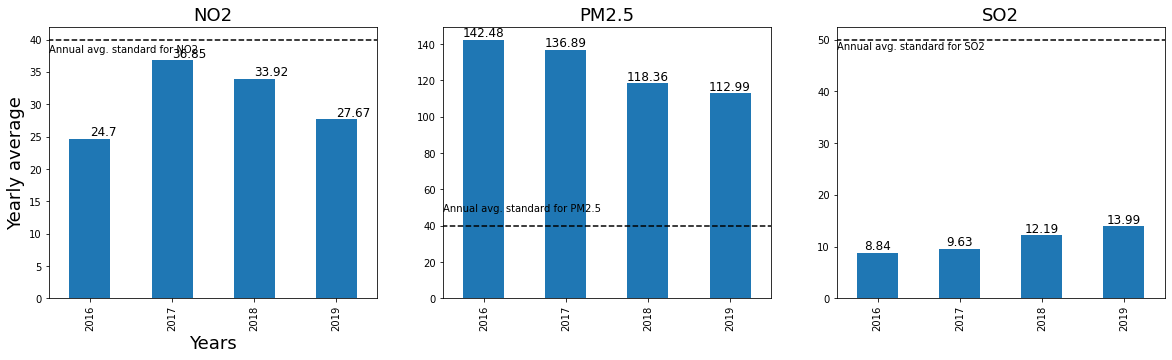

In [22]:
#Creating a figure with 3 subplots - 1 for each pollutant
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
#Creating a DataFrame the yearly averages for NO2
dfn.plot(kind='bar',figsize=(20,5),ax=ax1)
#Setting the title for the first axes object
ax1.set_title("NO2", fontsize=18)
#Setting the X-axis label for the NO2 graph
ax1.set_xlabel("Years", fontsize=18)
ax1.legend().set_visible(False)
#Setting the Y-axis label
ax1.set_ylabel("Yearly average", fontsize=18)
#Creating a dashed line to indicate the annual standard
ax1.hlines(40, -.9,15, linestyles="dashed")
#Labelling this dashed line
ax1.annotate('Annual avg. standard for NO2',(-0.5,38))
#labelling the bars
for p in ax1.patches:
    ax1.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), color="black", ha="left", va ='bottom',fontsize=12)

#Plotting the yearly averages similarly for PM2.5
dfp.plot(kind='bar',figsize=(20,5),ax=ax2)
ax2.set_title("PM2.5", fontsize=18)
ax2.hlines(40, -.9,15, linestyles="dashed")
ax2.annotate('Annual avg. standard for PM2.5',(-0.5,48))
ax2.legend().set_visible(False)
for p in ax2.patches:
    ax2.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), color="black", ha="center", va ='bottom',fontsize=12)

#Plotting the yearly averages similarly for SO2
dfs.plot(kind='bar',figsize=(20,5),ax=ax3)
ax3.hlines(50, -.9,15, linestyles="dashed")
ax3.annotate('Annual avg. standard for SO2',(-0.5,48))
ax3.set_title("SO2", fontsize=18)
ax3.legend().set_visible(False)
for p in ax3.patches:
    ax3.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), color="black", ha="center", va ='bottom',fontsize=12)

Наблюдение: очевидно, что среднегодовые нормы превышаются только для PM2,5.
Для NO2 наблюдаемые значения относительно близки к предписанному стандарту. Для SO2 наблюдаемые значения намного меньше годовой нормы. Поэтому для дальнейшего анализа учитываются только эти два загрязнителя (NO2 и PM2,5)

**Часть 2 анализа качества воздуха: график количества дней в году, когда 24 часа в сутки превышены нормы для PM2,5 и NO2**

В то время как на этапе 1 анализа указываются загрязнители, вызывающие озабоченность с точки зрения управления качеством воздуха. и планирование вмешательств, на шаге 2, на каждый год, мы показываем, как различные уровни
превышение нормативов для суточных значений распределяется. В случае PM2,5 мы
нанесите на график количество дней в году, для которых наблюдаемые значения попадают в следующие диапазоны.
  а. От 0 до 60 мкг / м3
  б. От 61 до 120 мкг / м3
  c. От 121 до 180 мкг / м3
  d. > 180 мкг / м3
Чтобы построить эти данные, нам нужно создать объекты DataFrame для каждого года с 2016 по 2019 год. фиксирование количества дней, в течение которых уровни PM2,5 падали в каждом из этих интервалов, как показано В следующих:

In [23]:
#Creating intervals for 2016 with the number of days with PM2.5  concentration falling in that interval
a2=aq2016[(aq2016['PM2.5']<=60)]['PM2.5'].count()
b2=aq2016[((aq2016['PM2.5']>60) & (aq2016['PM2.5']<=120))]['PM2.5'].count()
c2=aq2016[((aq2016['PM2.5']>120) & (aq2016['PM2.5']<=180))]['PM2.5'].count()
d2=aq2016[(aq2016['PM2.5']>180)]['PM2.5'].count()
dfpb2016=pd.DataFrame({'year':'2016','pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],'number of critical days':[a2,b2,c2,d2]})
#Creating intervals for 2017 with the number of days with PM2.5  concentration falling in each interval
a3=aq2017[(aq2017['PM2.5']<=60)]['PM2.5'].count()
b3=aq2017[((aq2017['PM2.5']>60) & (aq2017['PM2.5']<=120))]['PM2.5'].count()
c3=aq2017[((aq2017['PM2.5']>120) & (aq2017['PM2.5']<=180))]['PM2.5'].count()
d3=aq2017[(aq2017['PM2.5']>180)]['PM2.5'].count()
dfpb2017=pd.DataFrame({'year':'2017','pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],'number of critical days':[a3,b3,c3,d3]})
#Creating intervals for 2018 with the number of days with PM2.5  concentration falling in each interval
a4=aq2018[(aq2018['PM2.5']<=60)]['PM2.5'].count()
b4=aq2018[((aq2018['PM2.5']>60) & (aq2018['PM2.5']<=120))]['PM2.5'].count()
c4=aq2018[((aq2018['PM2.5']>120) & (aq2018['PM2.5']<=180))]['PM2.5'].count()
d4=aq2018[(aq2018['PM2.5']>180)]['PM2.5'].count()
dfpb2018=pd.DataFrame({'year':'2018','pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],'number of critical days':[a4,b4,c4,d4]})
#Creating intervals for 2019 with the number of days with PM2.5 concentration falling in each interval
a5=aq2019[(aq2019['PM2.5']<=60)]['PM2.5'].count()
b5=aq2019[((aq2019['PM2.5']>60) & (aq2019['PM2.5']<=120))]['PM2.5'].count()
c5=aq2019[((aq2019['PM2.5']>120) & (aq2019['PM2.5']<=180))]['PM2.5'].count()
d5=aq2019[(aq2019['PM2.5']>180)]['PM2.5'].count()
dfpb2019=pd.DataFrame({'year':'2019','pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],'number of critical days':[a5,b5,c5,d5]})

Теперь мы строим столбчатую диаграмму с накоплением для каждого года с этими интервалами. Для этого нам нужно создать сводные таблицы следующим образом:

In [24]:
dfpivot2019 = dfpb2019.pivot(index='year',columns='pm levels', values='number of critical days')
dfpivot2018 = dfpb2018.pivot(index='year',columns='pm levels', values='number of critical days')
dfpivot2017 = dfpb2017.pivot(index='year',columns='pm levels', values='number of critical days')
dfpivot2016 = dfpb2016.pivot(index='year',columns='pm levels', values='number of critical days')

Text(0.5, 1.0, '2016')

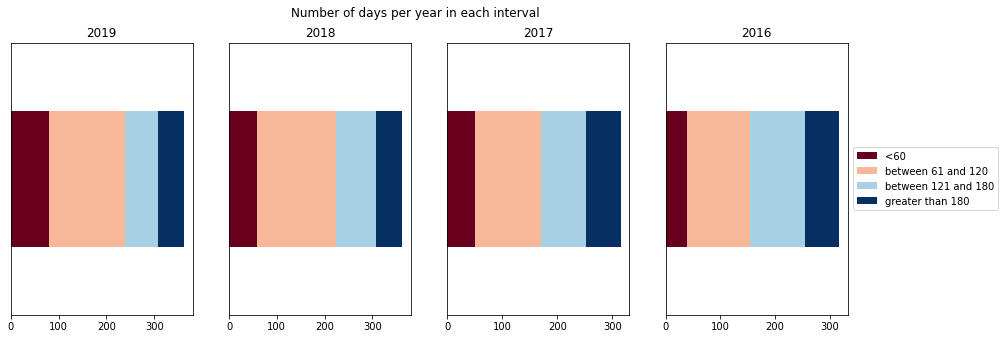

In [25]:
#Creating a figure with 4 sub-plots, one for each year from 2016-19
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4)
fig.suptitle("Number of days per year in each interval")
cmp=plt.cm.get_cmap('RdBu')
#Plotting stacked horizontal bar charts for each year to represent intervals of PM2.5 levels
dfpivot2019.loc[:,['<60','between 61 and 120','between 121 and 180', 'greater than 180']].plot.barh(stacked=True, cmap=cmp,figsize=(15,5),ax=ax1)
dfpivot2018.loc[:,['<60','between 61 and 120','between 121 and 180','greater than 180']].plot.barh(stacked=True, cmap=cmp,figsize=(15,5),ax=ax2)
dfpivot2017.loc[:,['<60','between 61 and 120','between 121 and 180','greater than 180']].plot.barh(stacked=True, cmap=cmp, figsize=(15,5),ax=ax3)
dfpivot2016.loc[:,['<60','between 61 and 120','between 121 and 180','greater than 180']].plot.barh(stacked=True, cmap=cmp, figsize=(15,5),ax=ax4)
#Setting the properties - legend, yaxis and title
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)
ax4.legend(loc='center left',bbox_to_anchor=(1,0.5))
ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax1.set_title('2019')
ax2.set_title('2018')
ax3.set_title('2017')
ax4.set_title('2016')

Наблюдение:
Видно, что значения PM2,5 выше 180 мкг/м3 наблюдаются каждый год, и поэтому
Начнем с того, что ограничения на основные виды деятельности, загрязняющие окружающую среду, включая движение транспорта, могут быть ограничены
в эту категорию. Интервальное построение NO2 Аналогичным образом, для NO2 количество дней в году, в течение которых контролируемые значения превышают 24-часовой стандарт 80 мкг / м3 нанесен на график (рис. 8-6). Сначала мы создаем фрейм данных для NO2, который фиксирует количество дней в году с значения выше 80 мкг / м3, как показано ниже.

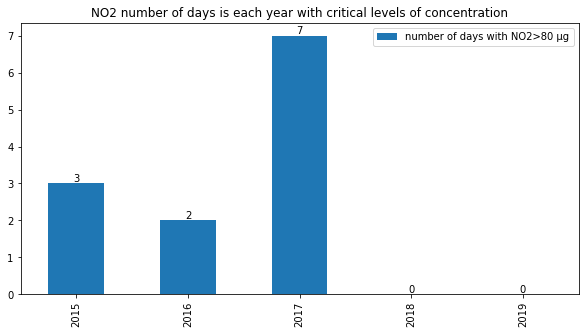

In [26]:
a = aq2015[(aq2015['NO2']>=80)]['NO2'].count()
b = aq2016[(aq2016['NO2']>=80)]['NO2'].count()
c = aq2017[(aq2017['NO2']>=80)]['NO2'].count()
d = aq2018[(aq2018['NO2']>=80)]['NO2'].count()
e = aq2019[(aq2019['NO2']>=80)]['NO2'].count()

dfno=pd.DataFrame({'years':['2015', '2016', '2017', '2018', '2019'], 'number of days with NO2>80 μg':[a, b, c, d, e]})
ax = dfno.plot(kind='bar', figsize = (10, 5))
ax.set_xticklabels(['2015', '2016', '2017', '2018', '2019'])
ax.set_title("NO2 number of days is each year with critical levels of concentration")

for p in ax.patches:
    ax.annotate(p.get_height().round(2), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')

In [44]:
q2015 = aq2015.sort_values(by=['NO2'], ascending=False).reset_index(drop=True).head(3)
q2015[['From Date', 'NO2']]

,From Date,NO2
0,2015-06-08,102.43
1,2015-08-18,86.10
2,2015-11-09,84.87


In [45]:
q2016 = aq2016.sort_values(by=['NO2'], ascending=False).reset_index(drop=True).head(2)
q2016[['From Date', 'NO2']]

,From Date,NO2
0,2016-11-11,108.02
1,2016-11-12,82.61


In [46]:
q2017 = aq2017.sort_values(by=['NO2'], ascending=False).reset_index(drop=True).head(7)
q2017[['From Date', 'NO2']]

,From Date,NO2
0,2017-07-19,285.53
1,2017-07-17,216.65
2,2017-09-28,180.10
3,2017-07-29,122.20
4,2017-11-29,103.93
5,2017-07-30,100.78
6,2017-11-28,85.41


Вывод: наблюдаемые суточные значения NO2 превышаются только в течение трех из пяти лет.
Поскольку наблюдаемые суточные значения NO2 превышают стандартные лишь незначительно и только в течение нескольких дней, следующий шаг ограничен дальнейшим анализом PM2,5.
Часть 3 анализа качества воздуха: Определение месяцев, в которые суточные значения PM2,5 превышают критические уровни в большинстве дней Перед введением ограничений на такие виды деятельности, как движение транспортных средств и строительство, которые вносят значительный вклад в концентрации PM2,5 в окружающей среде, необходимо: предоставлять
достаточное уведомление, чтобы избежать неудобств для широкой публики. Следовательно, для суточных значений PM2,5, значительно превышающих 180 мкг / м3, мы наносим график изменения во времени по годам в течение каждого месяца в году. Для этого для каждого из двенадцати месяцев мы фиксируем количество дней с критическим загрязнением воздуха каждый год с суточными значениями PM2,5, превышающими 180 мкг / м3.
Сначала мы создаем кадры данных для каждого года с количеством дней в каждом месяце, когда значения PM2,5 превышают 180 мкг / м3, как показано ниже.

In [27]:
#Creating a dataframe for 2016 with the number of days in each month where the PM2.5 concentration is >180
aq2016['Month']=pd.DatetimeIndex(aq2016['From Date']).month #extracting the month
aq2016['condition']=(aq2016['PM2.5']>=180 ) # creating a boolean columnthat is True when the PM2.5 value is greater than 180 and false when it is less than 180
aq2016['condition']=aq2016['condition'].replace({False:np.nan}) # replacing the False values with null values, so that the count method in the next statement only counts the True values or the values corresponding to PM 2.5>180
selection1=aq2016.groupby('Month')['condition'].count() #Using the groupby method to calculate the number of days for each month that satisfy the condition(PM2.5>180)
#Repeating the above process for 2017, creating a dataframe with the number of days in each month where the PM2.5 concentration is >180
aq2017['Month']=pd.DatetimeIndex(aq2017['From Date']).month
aq2017['condition']=(aq2017['PM2.5']>=180 )
aq2017['condition']=aq2017['condition'].replace({False:np.nan})
selection2=aq2017.groupby('Month')['condition'].count()
#Repeating the above process for 2018, creating a dataframe with the number of days in each month where the PM2.5 concentration is >180
aq2018['Month']=pd.DatetimeIndex(aq2018['From Date']).month
aq2018['condition']=(aq2018['PM2.5']>=180 )
aq2018['condition']=aq2018['condition'].replace({False:np.nan})
selection3=aq2018.groupby('Month')['condition'].count()
#Repeating the above process for 2019, creating a dataframe with the number of days in each month where the PM2.5 concentration is >180
aq2019['Month']=pd.DatetimeIndex(aq2019['From Date']).month
aq2019['condition']=(aq2019['PM2.5']>=180 )
aq2019['condition']=aq2019['condition'].replace({False:np.nan})
selection4=aq2019.groupby('Month')['condition'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Теперь мы объединяем все объекты DataFrame в один объект (который мы назовем
‘Selectionc’), чтобы получить сводную картину количества дней в каждом месяце, когда PM2,5> 180 мкг / м3, как показано ниже.

In [28]:
selectionc=pd.concat([selection1,selection2,selection3,selection4], axis=1)
selectionc.columns=['2016','2017','2018','2019']
selectionc

,2016,2017,2018,2019
Month,,,,
1,20,3,23,14
2,3,0,5,3
3,1,7,0,0
4,3,1,0,1
5,3,1,0,2
6,7,5,4,1
7,2,0,0,0
8,0,0,0,0
9,2,0,0,0


Мы можем наблюдать из этой таблицы, что месяц 1 (январь), месяц 11 (ноябрь) и
12-й месяц (декабрь) - самые критические месяцы за все четыре года, так как эти месяцы было наибольшее количество дней с PM2,5> 180 мкг / м3.
Теперь, когда у нас есть все данные, давайте визуализируем критические дни для PM2,5. (Рисунок 8-7), используя следующий код.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support '-' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'x' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support '/' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'O' instances.
A proxy artist ma

Text(0.5, 1.0, 'Number of days with critical levels of PM2.5 in each month of years 2016-19')

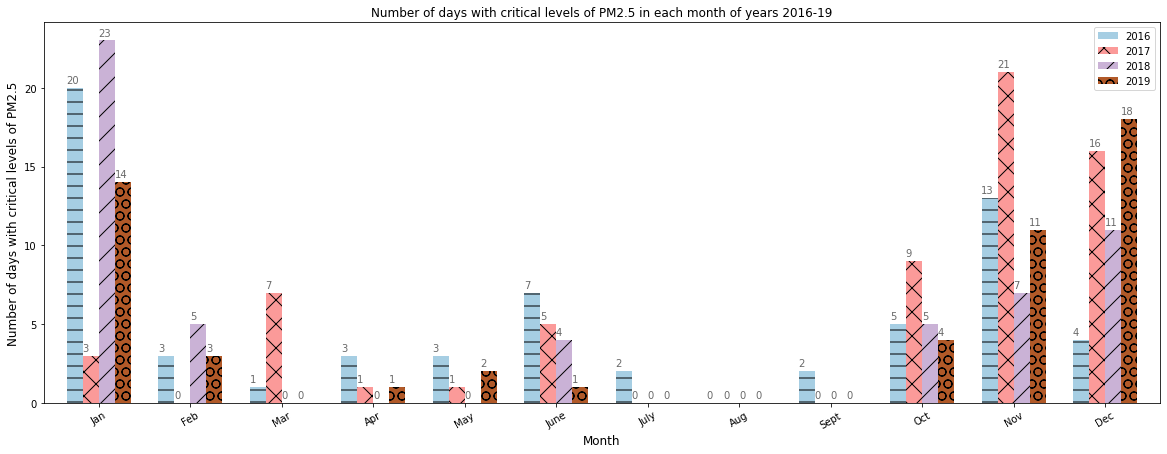

In [29]:
#creating a bar chart representing number of days with critical levels of PM2.5(>180) concentrations
ax=selectionc.plot(kind='bar',figsize=(20,7),width=0.7,align='center',colormap='Paired')
bars = ax.patches
#creating patterns to represent each year
patterns =('-','x','/','O')
#ax.legend(loc='upper left', borderpad=1.5, labelspacing=1.5)
ax.legend((patterns),('2016','2017','2018','2019'))
hatches = [p for p in patterns for i in range(len(selectionc))]
#setting a pattern for each bar
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
#Labelling the months, the X axis and Y axis
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],rotation=30)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Number of days with critical levels of PM2.5',fontsize=12)
#Labelling the bars
for i in ax.patches:
    ax.text(i.get_x()-.003, i.get_height()+.3,
            round(i.get_height(),2), fontsize=10,
                color='dimgrey')
ax.legend()
ax.set_title("Number of days with critical levels of PM2.5 in each month of years 2016-19")

# **Шаг 4: построение выводов на основе анализа и визуализаций**

Из предыдущего графика видно, что большинство критически загрязненных дней приходится на Январь, ноябрь и декабрь. Следовательно, исходя из среднесуточных концентраций PM2,5 зафиксировано за последние четыре года, ограничения движения автотранспорта, строительство деятельность, использование дизельных насосных агрегатов, отклонение движения транспорта, прибывающего в Дели из соседних штатов, и другие аналогичные действия, вероятно, будут введены в январе, ноябре и Декабрь. Чтобы принять такие решения для Дели в целом, анализ данных из других
также потребуются станции мониторинга. Распространение данных и анализ
предыдущие строки помогут людям заранее подготовиться к ограничениям, а также
оцените обоснование таких мер.
Подход, продемонстрированный ранее, с использованием анализа данных в качестве инструмента, помогающего в управление качеством воздуха, использует данные, записанные на одной станции мониторинга, расположенной в
Технологический институт Нетаджи Субхаса (NSIT), Дели. Методология могла быть осуществлена вперед по следующим строкам.
 а. Повторите предыдущий шаг для NO2, чтобы показать критические месяцы, в которые приходится на большую часть дней с зарегистрированными значениями NO2, превышающими 24-часовые стандарты. Выполнение этого упражнения снова поможет определить месяцев, когда уровни загрязнения вызывают озабоченность по обоим параметрам, PM2.5 и NO2, и план.
 б. Повторите анализ, проведенный с данными о качестве воздуха.станции мониторинга НСИТ с использованием аналогичных данных из другие станции, чтобы интервенции для Дели в целом могли быть планируется.